In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os

In [23]:
rootdir = '../experiments/'

folders = {
"cooja_line_0.1%":{"type":"cooja line", "index": 0, "param":"0.1%", "file":"/test_nogui_mrm_line"},
"cooja_line_0.25%":{"type":"cooja line", "index": 1, "param":"0.25%", "file":"/test_nogui_mrm_line"},
"cooja_line_0.5%":{"type":"cooja line", "index": 2, "param":"0.5%", "file":"/test_nogui_mrm_line"},
"cooja_line_1%":{"type":"cooja line", "index": 3, "param":"1%", "file":"/test_nogui_mrm_line"},
"cooja_line_5%":{"type":"cooja line", "index": 4, "param":"5%", "file":"/test_nogui_mrm_line"},
"cooja_line_rndDelay":{"type":"cooja line", "index": 5, "param":"random Delay", "file":"/test_nogui_mrm_line"},
"cooja_udgm_0.1%":{"type":"cooja normal", "index": 0, "param":"0.1%", "file": "/test_nogui_udgm"},
"cooja_udgm_0.25%":{"type":"cooja normal", "index": 1, "param":"0.25%", "file": "/test_nogui_udgm"},
"cooja_udgm_0.5%":{"type":"cooja normal", "index": 2, "param":"0.5%", "file": "/test_nogui_udgm"},
"cooja_udgm_1%":{"type":"cooja normal", "index": 3, "param":"1%", "file": "/test_nogui_udgm"},
"cooja_udgm_5%":{"type":"cooja normal", "index": 4, "param":"5%", "file": "/test_nogui_udgm"},
"cooja_udgm_rndDelay":{"type":"cooja normal", "index": 5, "param":"random Delay", "file": "/test_nogui_udgm"},
"testbed_0.1%":{"type":"testbed", "index": 0, "param":"0.1%","file":"/test" },
"testbed_0.25%":{"type":"testbed", "index": 1, "param":"0.25%","file":"/test" },
"testbed_0.5%":{"type":"testbed", "index": 2, "param":"0.5%","file":"/test" },
"testbed_1%":{"type":"testbed", "index": 3, "param":"1%","file":"/test" },
"testbed_5%":{"type":"testbed", "index": 4, "param":"5%","file":"/test" },
"testbed_rndDelay":{"type":"testbed", "index": 5, "param":"random Delay","file":"/test" },
}

xlabel = ['0.1%', '0.25%', '0.5%', '1%', '5%', 'random delay']

# types = ["cooja line", "cooja normal", "testbed"]
pdr = {'cooja line':[], 'cooja normal':[], 'testbed':[]}
dc = {'cooja line':[], 'cooja normal':[], 'testbed':[]}
pdr["cooja line"] = np.zeros((6,9))-1
pdr["cooja normal"] = np.zeros((6,8))-1
pdr["testbed"] = np.zeros((6,35))-1
dc["cooja line"] = np.zeros((6,9))-1
dc["cooja normal"] = np.zeros((6,8))-1
dc["testbed"] = np.zeros((6,35))-1

for folder in folders:
    dfPdr = pd.read_csv(rootdir + folder + folders[folder]["file"]+'-pdr.csv', sep='\t')
    for index, row in dfPdr.iterrows():
        pdr[folders[folder]["type"]][folders[folder]["index"]][int(row['node']-2)] = row['pdr']
        
    dfDc = pd.read_csv(rootdir + folder + folders[folder]["file"]+'-dc.csv', sep='\t')
    for index, row in dfDc.iterrows():
        dc[folders[folder]["type"]][folders[folder]["index"]][int(row['node']-2)] = row['dc']

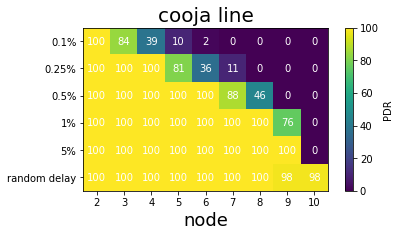

In [17]:
fontsize = 18
textSize = 10
figsize=(6,3)
key = "cooja line"
fig, ax = plt.subplots(figsize=figsize)
im = ax.imshow(pdr[key], cmap='viridis')
ax.set_title(key, fontsize=20)
ax.set_xticks(np.arange(pdr[key].shape[1]))
ax.set_yticks(np.arange(pdr[key].shape[0]))
ax.set_yticklabels(xlabel)
ax.set_xticklabels(np.arange(pdr[key].shape[1])+2)
ax.set_xlabel('node', fontsize=fontsize)
# ax.set_ylabel('experiment', fontsize=fontsize)
for i in range(pdr[key].shape[0]):
    for j in range(pdr[key].shape[1]):
        ax.text(j, i, "{:.0f}".format(pdr[key][i, j]),
                    ha="center", va="center", color="w", size=textSize)
PCM=ax.get_children()[2]
norm = mpl.colors.Normalize(vmin=0, vmax=100)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='viridis'), label="PDR")
plt.show()

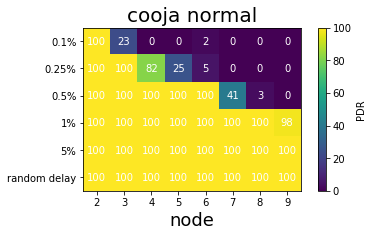

In [18]:
key = "cooja normal"
fig, ax = plt.subplots(figsize=figsize)
im = ax.imshow(pdr[key], cmap='viridis')
ax.set_title(key, fontsize=20)
ax.set_xticks(np.arange(pdr[key].shape[1]))
ax.set_yticks(np.arange(pdr[key].shape[0]))
ax.set_yticklabels(xlabel)
ax.set_xticklabels(np.arange(pdr[key].shape[1])+2)
ax.set_xlabel('node', fontsize=fontsize)
# ax.set_ylabel('experiment', fontsize=fontsize)
for i in range(pdr[key].shape[0]):
    for j in range(pdr[key].shape[1]):
        ax.text(j, i, "{:.0f}".format(pdr[key][i, j]),
                    ha="center", va="center", color="w", size=textSize)
PCM=ax.get_children()[2]
norm = mpl.colors.Normalize(vmin=0, vmax=100)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='viridis'), label="PDR")
plt.show()

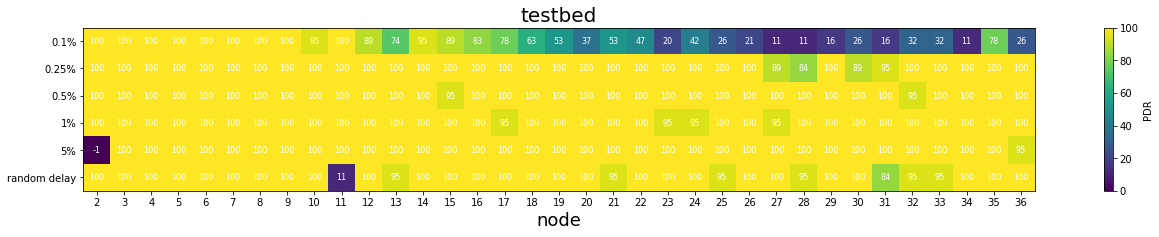

In [19]:
key = "testbed"
fig, ax = plt.subplots(figsize=(25,3))
im = ax.imshow(pdr[key], cmap='viridis')
ax.set_title(key, fontsize=20)
ax.set_xticks(np.arange(pdr[key].shape[1]))
ax.set_yticks(np.arange(pdr[key].shape[0]))
ax.set_yticklabels(xlabel)
ax.set_xticklabels(np.arange(pdr[key].shape[1])+2)
ax.set_xlabel('node', fontsize=fontsize)
# ax.set_ylabel('experiment', fontsize=fontsize)
for i in range(pdr[key].shape[0]):
    for j in range(pdr[key].shape[1]):
        ax.text(j, i, "{:.0f}".format(pdr[key][i, j]),
                    ha="center", va="center", color="w", size=8)
PCM=ax.get_children()[2]
norm = mpl.colors.Normalize(vmin=0, vmax=100)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='viridis'), label='PDR')
plt.show()

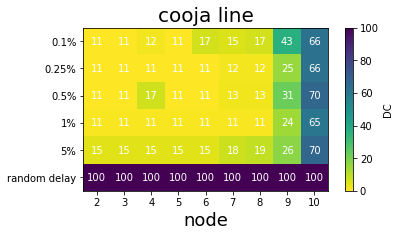

22.566
18.85355555555556
20.822666666666667
18.691666666666666
22.924999999999997
99.99988888888889


In [30]:
key = "cooja line"
fig, ax = plt.subplots(figsize=figsize)
im = ax.imshow(dc[key], cmap='viridis_r')
ax.set_title(key, fontsize=20)
ax.set_xticks(np.arange(dc[key].shape[1]))
ax.set_yticks(np.arange(dc[key].shape[0]))
ax.set_yticklabels(xlabel)
ax.set_xticklabels(np.arange(dc[key].shape[1])+2)
ax.set_xlabel('node', fontsize=fontsize)
# ax.set_ylabel('experiment', fontsize=fontsize)
for i in range(dc[key].shape[0]):
    for j in range(dc[key].shape[1]):
        ax.text(j, i, "{:.0f}".format(dc[key][i, j]),
                    ha="center", va="center", color="w", size=textSize)
PCM=ax.get_children()[2]
norm = mpl.colors.Normalize(vmin=0, vmax=100)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='viridis_r'), label="DC")
plt.show()
for d in dc[key]:
    print(np.average(d))

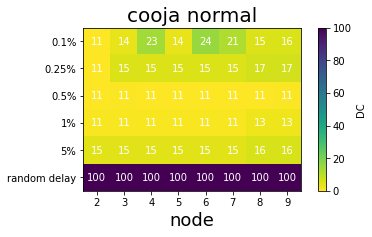

17.281750000000002
15.199375
11.008375000000001
11.767375
14.984000000000002
99.999875


In [31]:
key = "cooja normal"
fig, ax = plt.subplots(figsize=figsize)
im = ax.imshow(dc[key], cmap='viridis_r')
ax.set_title(key, fontsize=20)
ax.set_xticks(np.arange(dc[key].shape[1]))
ax.set_yticks(np.arange(dc[key].shape[0]))
ax.set_yticklabels(xlabel)
ax.set_xticklabels(np.arange(dc[key].shape[1])+2)
ax.set_xlabel('node', fontsize=fontsize)
# ax.set_ylabel('experiment', fontsize=fontsize)
for i in range(dc[key].shape[0]):
    for j in range(dc[key].shape[1]):
        ax.text(j, i, "{:.0f}".format(dc[key][i, j]),
                    ha="center", va="center", color="w", size=textSize)
PCM=ax.get_children()[2]
norm = mpl.colors.Normalize(vmin=0, vmax=100)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='viridis_r'), label="DC")
plt.show()
for d in dc[key]:
    print(np.average(d))

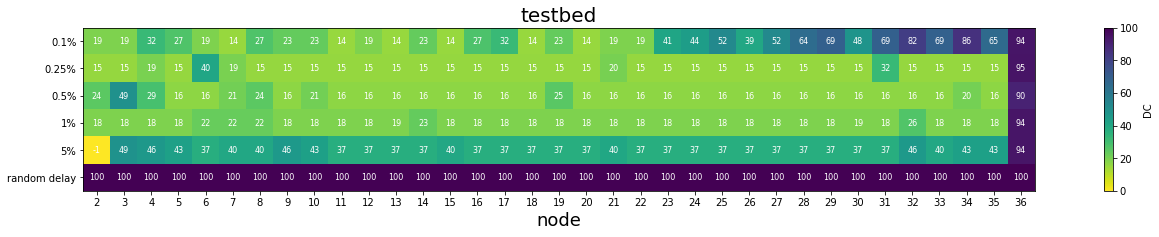

37.38102857142857
18.944800000000004
20.70377142857143
21.303571428571427
39.41177142857143
100.0


In [32]:
key = "testbed"
fig, ax = plt.subplots(figsize=(25,3))
im = ax.imshow(dc[key], cmap='viridis_r')
ax.set_title(key, fontsize=20)
ax.set_xticks(np.arange(dc[key].shape[1]))
ax.set_yticks(np.arange(dc[key].shape[0]))
ax.set_yticklabels(xlabel)
ax.set_xticklabels(np.arange(dc[key].shape[1])+2)
ax.set_xlabel('node', fontsize=fontsize)
# ax.set_ylabel('experiment', fontsize=fontsize)
for i in range(dc[key].shape[0]):
    for j in range(dc[key].shape[1]):
        ax.text(j, i, "{:.0f}".format(dc[key][i, j]),
                    ha="center", va="center", color="w", size=8)
PCM=ax.get_children()[2]
norm = mpl.colors.Normalize(vmin=0, vmax=100)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='viridis_r'), label='DC')
plt.show()
for d in dc[key]:
    print(np.average(d))